In [1]:

from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite", echo = False)

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [11]:
# Calculate the date 1 year ago from the last data point in the database
sql = '''select distinct
            (select MAX(m1.date)from measurement as m1)  as EndDate , 
            (select date(MAX(m2.date),'-1 year') from measurement as m2) as StartDate
         
        from measurement as m 

        '''
    

weatherList_df = pd.read_sql_query(sql, engine)

In [12]:
weatherList_df.head(122)

,EndDate,StartDate
0,2017-08-23,2016-08-23


In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Perform a query to retrieve the data and precipitation scores
sql = '''select 
            m.date as Date , 
            m.station as Station , 
            IFNULL(m.prcp, 0) as Precipitation , 
            m.tobs AS Temperature
        from measurement as m
        where m.date between 
        (select date(MAX(m2.date),'-1 year') from measurement as m2)
          and (select MAX(m1.date)from measurement as m1) '''

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column
weatherList_df = pd.read_sql_query(sql, engine)

In [14]:
# Sort the dataframe by date

weatherList_df.set_index('Date')
weatherList_df.head()

,Date,Station,Precipitation,Temperature
0,2016-08-23,USC00519397,0.00,81.0
1,2016-08-24,USC00519397,0.08,79.0
2,2016-08-25,USC00519397,0.08,80.0
3,2016-08-26,USC00519397,0.00,79.0
4,2016-08-27,USC00519397,0.00,77.0


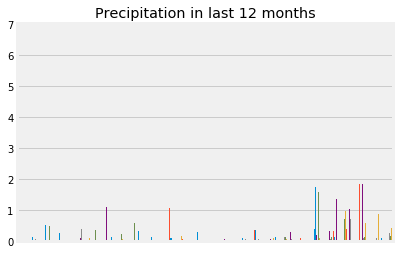

In [15]:
# Use Pandas Plotting with Matplotlib to plot the data
tx = weatherList_df['Precipitation'].plot(kind='bar', title ='Precipitation in last 12 months')
# tx = plt.axes()
x_axis = tx.axes.get_xaxis()
x_axis.set_visible(False)


![precipitation](Images/precipitation.png)

In [16]:
# Use Pandas to calcualte the summary statistics for the precipitation data
sql = '''select 
            measurement.date as Date , 
            measurement.station as Station , 
            IFNULL(measurement.prcp, 0) as Precipitation , 
            measurement.tobs AS Temperature
        from measurement
        where measurement.date between 
        (select date(MAX(m2.date),'-1 year') from measurement as m2)
          and (select MAX(m1.date)from measurement as m1) '''

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column
weatherData_df = pd.read_sql_query(sql, engine)

In [17]:
weatherSummary_df = pd.DataFrame(columns= ['Precipitation'])

In [18]:
weatherSummary_df.head()

,Precipitation


In [19]:
weatherSummary_df.loc['Count']= weatherData_df.shape[0]

In [20]:
weatherSummary_df.loc['Average']= weatherData_df['Precipitation'].mean()

In [21]:
weatherSummary_df.loc['StandDev']= weatherData_df['Precipitation'].std()

In [22]:
weatherSummary_df.loc['Min Precip']= weatherData_df['Precipitation'].min()

In [23]:
weatherSummary_df.loc['25%']= weatherData_df['Precipitation'].quantile([0.25])

In [24]:
weatherSummary_df.loc['50%']= weatherData_df['Precipitation'].quantile([0.50])

In [25]:
weatherSummary_df.loc['75%']= weatherData_df['Precipitation'].quantile([0.75])

In [26]:
weatherSummary_df.loc['Max Precip']= weatherData_df['Precipitation'].max()

In [27]:
weatherSummary_df

,Precipitation
Count,2230
Average,0.160664
StandDev,0.442067
Min Precip,0
25%,NaN
50%,NaN
75%,NaN
Max Precip,6.7


![describe](Images/describe.png)

In [28]:
# Design a query to show how many stations are available in this dataset?
# Use Pandas to calcualte the summary statistics for the precipitation data
sql = '''select distinct
            m.station as Station ,
            s.name as 'Station Name'
        from measurement as m
            inner join station as s
                on s.station = m.station
       '''
weatherStations_df = pd.read_sql_query(sql, engine)

In [29]:
weatherStations_df

,Station,Station Name
0,USC00519397,"WAIKIKI 717.2, HI US"
1,USC00513117,"KANEOHE 838.1, HI US"
2,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US"
3,USC00517948,"PEARL CITY, HI US"
4,USC00518838,"UPPER WAHIAWA 874.3, HI US"
5,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US"
6,USC00519281,"WAIHEE 837.5, HI US"
7,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US"
8,USC00516128,"MANOA LYON ARBO 785.2, HI US"


In [30]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
sql = '''select
            m.station as StationID ,
            s.name as StationName ,
            count(*) as READINGS        
        from measurement as m
            inner join station as s
                on s.station = m.station
        group by 
            m.station ,
            s.name
       order by 
           count(*) desc
         
       '''
weatherReadings_df = pd.read_sql_query(sql, engine)

In [31]:
weatherReadings_df

,StationID,StationName,READINGS
0,USC00519281,"WAIHEE 837.5, HI US",2772
1,USC00519397,"WAIKIKI 717.2, HI US",2724
2,USC00513117,"KANEOHE 838.1, HI US",2709
3,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",2669
4,USC00516128,"MANOA LYON ARBO 785.2, HI US",2612
5,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",2202
6,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",1979
7,USC00517948,"PEARL CITY, HI US",1372
8,USC00518838,"UPPER WAHIAWA 874.3, HI US",511


In [32]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

sql = '''select 
           
            m.station as Station , 
            s.name as StationName , 
            MIN(m.tobs) as MinTemp ,
            MAX(m.tobs) as MaxTemp ,
           printf("%.1f", SUM(m.tobs)/COUNT(*)) as AverageTemp 
        from measurement as m
               inner join station as s
                on s.station = m.station
        where m.station = 'USC00519281'
        group by 
            m.station ,
            s.name
       
   
   '''

# Save the query results as a Pandas DataFrame and set the index to the date column
weatherMostActive_df = pd.read_sql_query(sql, engine)


In [33]:
weatherMostActive_df.head()

,Station,StationName,MinTemp,MaxTemp,AverageTemp
0,USC00519281,"WAIHEE 837.5, HI US",54.0,85.0,71.7


In [34]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
sql = '''select 
            m.date as Date , 
            m.station as Station ,
            m.tobs AS Temperature
        from measurement as m
        where m.date between 
        (select date(MAX(m2.date),'-1 year') from measurement as m2)
          and (select MAX(m1.date)from measurement as m1)
          and
          m.station = 'USC00519281'
          '''

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column
weatherHisto_df = pd.read_sql_query(sql, engine)

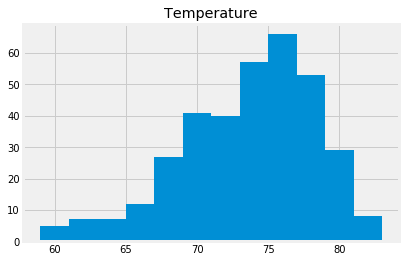

In [35]:
hist = weatherHisto_df.hist(bins=12)

![precipitation](Images/station-histogram.png)

In [36]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [37]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
print(calc_temps('2011-02-28', '2011-03-05'))

[(61.0, 69.75510204081633, 75.0)]


In [38]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [39]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

sql = '''select
            m.station as StationID ,
            s.name as StationName ,
            s.latitude as Latitude ,
            s.longitude as Longitude ,
            s.elevation as Elevation ,
            SUM(m.prcp) as RainTotal        
        from measurement as m
            inner join station as s
                on s.station = m.station
        where 
          m.date between'2011-02-28' and '2011-03-05'
        group by 
            m.station ,
            s.name
       order by 
           SUM(m.prcp) desc
         
       '''
weatherRain_df = pd.read_sql_query(sql, engine)

In [40]:
weatherRain_df

,StationID,StationName,Latitude,Longitude,Elevation,RainTotal
0,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6,2.33
1,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,2.23
2,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,2.19
3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0,1.96
4,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4,1.45
5,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6,1.44
6,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0,1.38
7,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9,0.63
8,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9,NaN


## Optional Challenge Assignment

In [41]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [42]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [43]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [44]:
# Plot the daily normals as an area plot with `stacked=False`
